In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk


In [88]:
#load the data
df = pd.read_csv('car_price_prediction.csv')

df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403.0,13328.0,1399,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507.0,16621.0,1018,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419.0,8467.0,-,HONDA,FIT,2006.0,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185.0,3607.0,862,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263.0,11726.0,446,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [89]:
#clean data
df.replace('-', np.nan, inplace=True)
df.dropna(inplace=True)

df['mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '').astype(int)

df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,mileage
0,45654403.0,13328.0,1399,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,186005
1,44731507.0,16621.0,1018,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,192000
3,45769185.0,3607.0,862,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,168966
4,45809263.0,11726.0,446,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,91901
5,45802912.0,39493.0,891,HYUNDAI,Santa FE,2016.0,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4,160931


In [90]:
# df['Engine volume'].unique()

#remove turbo
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '').astype(float)
df['Engine volume'].unique()

array([ 3.5,  3. ,  2.5,  1.3,  2. ,  1.8,  2.4,  3.3,  4.7,  1.6,  1.4,
        3.6,  4. ,  1.5,  2.2,  5.5,  3.8,  4.6,  2.3,  5. ,  2.9,  2.7,
        4.8,  5.3,  0.4,  2.1,  1.7,  0.7,  3.2,  4.4,  1. ,  1.9,  0.8,
        5.7,  1.2,  6.7,  6.2,  3.4,  0. ,  3.7, 20. ,  0.2,  5.6,  2.8,
        6.8,  6. ,  7.3,  4.5,  5.4,  6.4,  6.3,  3.9,  4.2,  0.1,  1.1,
        4.3,  2.6,  5.2])

In [91]:
#encode the manufacturer column
from sklearn.preprocessing import LabelEncoder

manufacturer_encoder=LabelEncoder()
manufacturer_encoder.fit(df['Manufacturer'])
df['manufacturer_encoded']=manufacturer_encoder.transform(df['Manufacturer'])


In [92]:
#check encoded keys
manufacturer_encoder.classes_

array(['ACURA', 'AUDI', 'BENTLEY', 'BMW', 'BUICK', 'CADILLAC',
       'CHEVROLET', 'CHRYSLER', 'CITROEN', 'DAEWOO', 'DAIHATSU', 'DODGE',
       'FERRARI', 'FIAT', 'FORD', 'GAZ', 'GMC', 'HONDA', 'HUMMER',
       'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA', 'LAMBORGHINI',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI', 'MAZDA',
       'MERCEDES-BENZ', 'MERCURY', 'MINI', 'MITSUBISHI', 'NISSAN', 'OPEL',
       'PEUGEOT', 'PORSCHE', 'RENAULT', 'SCION', 'SKODA', 'SSANGYONG',
       'SUBARU', 'SUZUKI', 'TESLA', 'TOYOTA', 'VAZ', 'VOLKSWAGEN',
       'VOLVO'], dtype=object)

In [93]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,mileage,manufacturer_encoded
0,45654403.0,13328.0,1399,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,186005,26
1,44731507.0,16621.0,1018,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,192000,6
3,45769185.0,3607.0,862,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,168966,14
4,45809263.0,11726.0,446,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,91901,17
5,45802912.0,39493.0,891,HYUNDAI,Santa FE,2016.0,Jeep,Yes,Diesel,2.0,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4,160931,19


In [94]:
#selects columns to use as features
x=df[['manufacturer_encoded', 'Engine volume', 'Prod. year', 'mileage', 'Levy']]
y=df['Price']

In [95]:
x.head()

,manufacturer_encoded,Engine volume,Prod. year,mileage,Levy
0,26,3.5,2010.0,186005,1399
1,6,3.0,2011.0,192000,1018
3,14,2.5,2011.0,168966,862
4,17,1.3,2014.0,91901,446
5,19,2.0,2016.0,160931,891


In [96]:
y.head()

0    13328.0
1    16621.0
3     3607.0
4    11726.0
5    39493.0
Name: Price, dtype: float64

In [97]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13413 entries, 0 to 19236
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   manufacturer_encoded  13413 non-null  int64  
 1   Engine volume         13413 non-null  float64
 2   Prod. year            13413 non-null  float64
 3   mileage               13413 non-null  int64  
 4   Levy                  13413 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 628.7+ KB


In [98]:
#choose machine model and train

#linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [99]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9389 entries, 12191 to 3929
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   manufacturer_encoded  9389 non-null   int64  
 1   Engine volume         9389 non-null   float64
 2   Prod. year            9389 non-null   float64
 3   mileage               9389 non-null   int64  
 4   Levy                  9389 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 440.1+ KB


In [100]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4024 entries, 12708 to 14124
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   manufacturer_encoded  4024 non-null   int64  
 1   Engine volume         4024 non-null   float64
 2   Prod. year            4024 non-null   float64
 3   mileage               4024 non-null   int64  
 4   Levy                  4024 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 188.6+ KB


In [101]:
#train the model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [102]:
#predict
result=lr_model.predict([[6,3.0,2015,30000,13000]])
result

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([83987.43900434])

In [103]:
#test model
y_pred = lr_model.predict(x_test)

from sklearn.metrics import mean_squared_error
mse_value=mean_squared_error(y_test, y_pred)
rmse_value=np.sqrt(mse_value)

print('Mean Squared Error:', mse_value)
print('Root Mean Squared Error:', rmse_value)


Mean Squared Error: 906384479372.532
Root Mean Squared Error: 952042.2676396946


In [104]:
df.describe()

,ID,Price,Prod. year,Engine volume,Cylinders,Airbags,mileage,manufacturer_encoded
count,1.341300e+04,13413.000000,13413.000000,13413.000000,13413.000000,13413.000000,1.341300e+04,13413.000000
mean,4.566782e+07,17299.988891,2013.137180,2.317297,4.516812,6.893909,3.725274e+05,25.547752
std,4.791320e+05,19373.080749,3.050397,0.872943,1.122973,4.465078,2.045238e+07,13.476556
min,3.175700e+07,1.000000,1965.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,4.572710e+07,3607.000000,2011.000000,1.800000,4.000000,4.000000,6.800000e+04,19.000000
50%,4.577056e+07,13500.000000,2013.000000,2.000000,4.000000,4.000000,1.183660e+05,19.000000
75%,4.580322e+07,23436.000000,2015.000000,2.500000,4.000000,12.000000,1.792000e+05,41.000000
max,4.581665e+07,872946.000000,2020.000000,20.000000,16.000000,16.000000,2.147484e+09,48.000000


In [105]:
#make price type categorical into cheap and expensive 
df['price_type'] = pd.cut(df['Price'], bins=[0, 17300, 872946], labels=['cheap', 'expensive'])

df['price_type'].value_counts()

price_type
cheap        8293
expensive    5120
Name: count, dtype: int64

In [106]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,mileage,manufacturer_encoded,price_type
0,45654403.0,13328.0,1399,LEXUS,RX 450,2010.0,Jeep,Yes,Hybrid,3.5,...,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,186005,26,cheap
1,44731507.0,16621.0,1018,CHEVROLET,Equinox,2011.0,Jeep,No,Petrol,3.0,...,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,192000,6,cheap
3,45769185.0,3607.0,862,FORD,Escape,2011.0,Jeep,Yes,Hybrid,2.5,...,4.0,Automatic,4x4,04-May,Left wheel,White,0,168966,14,cheap
4,45809263.0,11726.0,446,HONDA,FIT,2014.0,Hatchback,Yes,Petrol,1.3,...,4.0,Automatic,Front,04-May,Left wheel,Silver,4,91901,17,cheap
5,45802912.0,39493.0,891,HYUNDAI,Santa FE,2016.0,Jeep,Yes,Diesel,2.0,...,4.0,Automatic,Front,04-May,Left wheel,White,4,160931,19,expensive


In [107]:
x.head()

,manufacturer_encoded,Engine volume,Prod. year,mileage,Levy
0,26,3.5,2010.0,186005,1399
1,6,3.0,2011.0,192000,1018
3,14,2.5,2011.0,168966,862
4,17,1.3,2014.0,91901,446
5,19,2.0,2016.0,160931,891


In [108]:
#encode price type
price_type_encoder = LabelEncoder()
price_type_encoder.fit(df['price_type'])
df['price_type_encoded'] = price_type_encoder.transform(df['price_type'])

y=df['price_type_encoded']

In [109]:
y.head()

0    0
1    0
3    0
4    0
5    1
Name: price_type_encoded, dtype: int64

In [111]:
#train a classfication
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf_model.fit(x_train, y_train)


RandomForestClassifier(max_depth=4, random_state=42)

In [112]:
#predict
result = rf_model.predict([[6,3.0,2015,30000,13000]])
result

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [113]:
#tst model wigth accuracy, precision, f1-score and recall
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import math

y_pred = rf_model.predict(x_test)
accuracy_score_value = accuracy_score(y_test, y_pred)
precision_score_value = precision_score(y_test, y_pred)
f1_score_value = f1_score(y_test, y_pred)
recall_score_value = recall_score(y_test, y_pred)

print('Accuracy Score:', math.floor(accuracy_score_value*100),"%")
print('Precision Score:', math.floor(precision_score_value*100),"%")
print('F1 Score:', math.floor(f1_score_value*100),"%")
print('Recall Score:', math.floor(recall_score_value*100),"%")


Accuracy Score: 67 %
Precision Score: 69 %
F1 Score: 43 %
Recall Score: 31 %


In [ ]:
#Hyperparameter tuning - Grd searchcv
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50,100,150, 200,250, 300],
    "max_depth": [2,3,4,6,7,8,9,10],
    "criterion": ["gini", "entropy","log_loss"]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1,verbose=2)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[CV] END .......criterion=gini, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END .......criterion=gini, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END .......criterion=gini, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END .......criterion=gini, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END .......criterion=gini, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END ......criterion=gini, max_depth=2, n_estimators=150; total time=   0.3s
[CV] END ......criterion=gini, max_depth=2, n_estimators=150; total time=   0.3s
[CV] END ......criterion=gin

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             verbose=2)

In [36]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}

In [37]:
tuned_model=grid_search.best_estimator_

y_pred = tuned_model.predict(x_test)
accuracy_score_value = accuracy_score(y_test, y_pred)
precision_score_value = precision_score(y_test, y_pred)

f1_score_value = f1_score(y_test, y_pred)
recall_score_value = recall_score(y_test, y_pred)

print('Accuracy Score:', math.floor(accuracy_score_value*100),"%")
print('Precision Score:', math.floor(precision_score_value*100),"%")
print('F1 Score:', math.floor(f1_score_value*100),"%")
print('Recall Score:', math.floor(recall_score_value*100),"%")

Accuracy Score: 79 %
Precision Score: 76 %
F1 Score: 71 %
Recall Score: 67 %


In [ ]:
#naives bayes
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)

accuracy_score_value = accuracy_score(y_test, y_pred)
precision_score_value = precision_score(y_test, y_pred)
f1_score_value = f1_score(y_test, y_pred)
recall_score_value = recall_score(y_test, y_pred)

print('Accuracy Score:', math.floor(accuracy_score_value*100),"%")
print('Precision Score:', math.floor(precision_score_value*100),"%")
print('F1 Score:', math.floor(f1_score_value*100),"%")
print('Recall Score:', math.floor(recall_score_value*100),"%")


Accuracy Score: 63 %
Precision Score: 52 %
F1 Score: 62 %
Recall Score: 76 %


In [28]:
#predict
result = nb_model.predict([[6,3.0,2015,30000,13000]])
result

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

<Axes: >

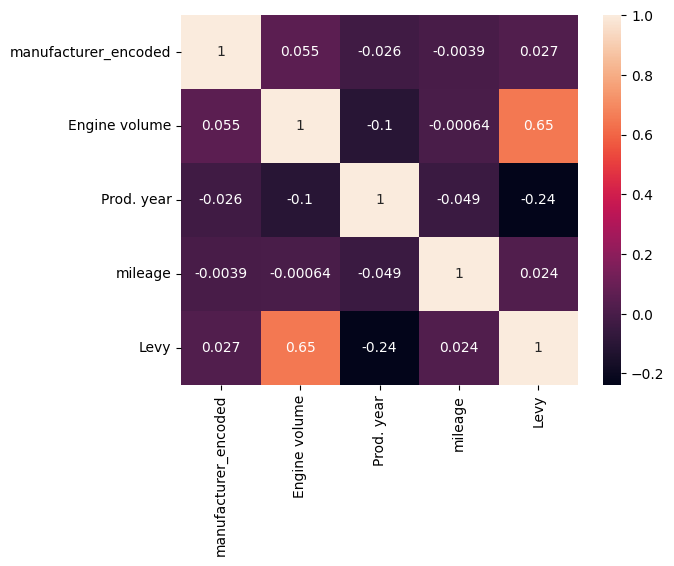

In [ ]:
#visualise the coorelation between the features
import seaborn as sns
sns.heatmap(x.corr(), annot=True)
